# Plotting the ERPs for sanity check

In [66]:
import readData as rd 
import mne 

just set the id and view the results.

In [ ]:
subjectid = '037'

In [67]:
raw,evts, evtsdict = rd.readBids(subjectid, applyfilter=False)
epochs = rd.get_epoched_Data(raw,evts, evtsdict)

Reading /home/jinaz/Desktop/EEG-semproject/bids/n170/sub-037/ses-N170/eeg/sub-037_ses-N170_task-N170_eeg.fdt
Reading events from bids/n170/sub-037/ses-N170/eeg/sub-037_ses-N170_task-N170_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> respo

/home/jinaz/Desktop/EEG-semproject/readData.py:32: RuntimeWarning: Data file name in EEG.data (sub-037_task-N170_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-037_ses-N170_task-N170_eeg.fdt).
  raw = read_raw_bids(bids_path)


    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renami

/home/jinaz/Desktop/EEG-semproject/readData.py:32: RuntimeWarning: Participants file not found for sub-037_ses-N170_task-N170_eeg.set... Not reading in any particpants.tsv data.
  raw = read_raw_bids(bids_path)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
bids/n170/sub-037/ses-N170/eeg/sub-037_ses-N170_task-N170_
Applying ICA to Raw instance


/home/jinaz/Desktop/EEG-semproject/ccs_eeg_semesterproject.py:102: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ica.ICA(method='imported_eeglab', n_components=n_components)
/home/jinaz/Desktop/EEG-semproject/ccs_eeg_semesterproject.py:71: UserWarning: loadtxt: Empty input file: "bids/n170/sub-037/ses-N170/eeg/sub-037_ses-N170_task-N170_badChannels.tsv"
  badChannels = np.loadtxt(fn + 'badChannels.tsv', delimiter='\t')
/home/jinaz/Desktop/EEG-semproject/readData.py:48: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads()


    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components
Used Annotations descriptions: ['response/201', 'response/202', 'stimulus/1', 'stimulus/10', 'stimulus/101', 'stimulus/102', 'stimulus/103', 'stimulus/104', 'stimulus/105', 'stimulus/106', 'stimulus/107', 'stimulus/108', 'stimulus/109', 'stimulus/11', 'stimulus/110', 'stimulus/111', 'stimulus/112', 'stimulus/113', 'stimulus/114', 'stimulus/115', 'stimulus/116', 'stimulus/117', 'stimulus/118', 'stimulus/119', 'stimulus/12', 'stimulus/120', 'stimulus/121', 'stimulus/122', 'stimulus/123', 'stimulus/124', 'stimulus/125', 'stimulus/126', 'stimulus/127', 'stimulus/128', 'stimulus/129', 'stimulus/13', 'stimulus/130', 'stimulus/131', 'stimulus/132', 'stimulus/133', 'stimulus/134', 'stimulus/135', 'stimulus/136', 'stimulus/137', 'stimulus/138', 'stimulus/139', 'stimulus/14', 'stimulus/140', 'stimulus/141', 'stimulus/142', 'stimulus/143', 'stimulus/144', 'stimulus/145', 'stim

applying the baseline if you want to

In [68]:
#epochs.apply_baseline((None,0))

In [69]:
evokeds = dict(cars=list(epochs['cars'].iter_evoked()),
faces=list(epochs['faces'].iter_evoked()),
scrambled_cars=list(epochs['scrambled_cars'].iter_evoked()),
scrambled_faces = list(epochs['scrambled_faces'].iter_evoked()))

In [70]:
evokeds_intact = dict(cars=list(epochs['cars'].iter_evoked()),
faces=list(epochs['faces'].iter_evoked()))

In [71]:
evokeds_scarmbled = dict(scrambled_cars=list(epochs['scrambled_cars'].iter_evoked()),
scrambled_faces = list(epochs['scrambled_faces'].iter_evoked()))

plot pairwise ERPs with Confidence intercvals, NOTE: the ERPs are NOT filtered

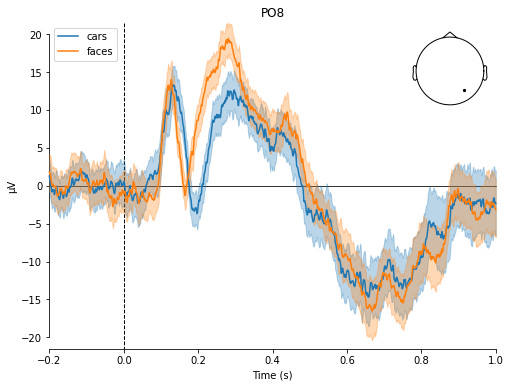

[<Figure size 576x432 with 2 Axes>]

In [72]:
mne.viz.plot_compare_evokeds(evokeds_intact,ci=0.95, picks=['PO8'])

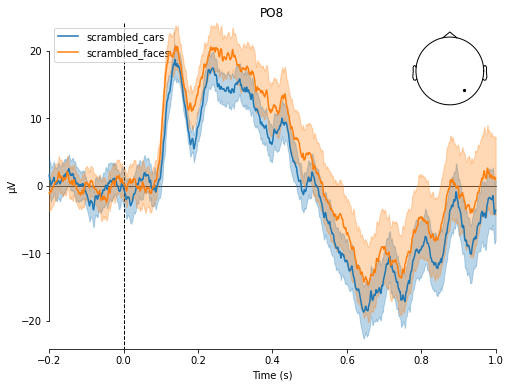

[<Figure size 576x432 with 2 Axes>]

In [73]:
mne.viz.plot_compare_evokeds(evokeds_scarmbled, picks=['PO8'], ci=True, legend=True)

plotting all 4 in same plot, might be a lot of visual clutter with the CIs

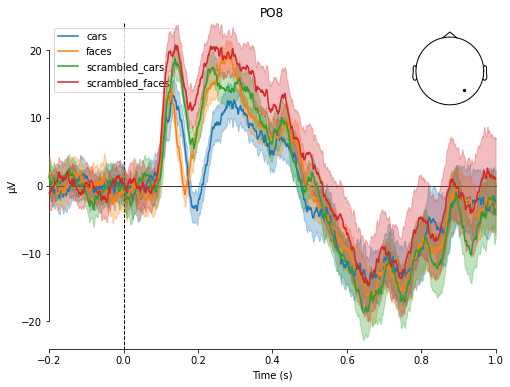

[<Figure size 576x432 with 2 Axes>]

In [74]:
mne.viz.plot_compare_evokeds(evokeds,  picks=['PO8'])